In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
cust_data=pd.read_csv('/content/drive/MyDrive/customer.csv')
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cust_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
cust_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
cust_data=cust_data.drop('customerID',axis=1)

In [13]:
for c in cust_data:
  u=cust_data[c].unique()
  print(f"{c}: {u}")

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [1 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [7]:
#Convert yes and no
category=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
          'StreamingMovies','Partner','PhoneService','Dependents','PaperlessBilling','Churn','MultipleLines']
cust_data[category]=cust_data[category].replace({'Yes':1,'No':0,'No internet service':0,'No phone service':0})
cust_data['gender']=cust_data['gender'].replace({"Male":1,"Female":0})
cust_data['InternetService']=cust_data['InternetService'].replace({"DSL":1,"Fiber optic":1,"No":0})

In [17]:
#remove " " to convert total charges to float data type
cust_data=cust_data[cust_data.TotalCharges!=' ']
cust_data['TotalCharges']=cust_data.TotalCharges.astype(float)

In [18]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
num_data=["tenure","MonthlyCharges","TotalCharges"]
#cat_data=["Contract","PaymentMethod"]
min=MinMaxScaler()
le=LabelEncoder()
cust_data["Contract"]=le.fit_transform(cust_data["Contract"])
cust_data["PaymentMethod"]=le.fit_transform(cust_data["PaymentMethod"])
cust_data[num_data]=min.fit_transform(cust_data[num_data])

In [19]:
cust_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [21]:
X=cust_data.drop('Churn',axis=1)
y=cust_data['Churn']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
skclf=RandomForestClassifier()
skclf.fit(X_train,y_train)


RandomForestClassifier()

In [23]:
skclf.score(X_test,y_test)

0.783226723525231

In [28]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
def full_evaluate(y_test,y_preds):
  a=accuracy_score(y_test,y_preds)*100
  pre=precision_score(y_test,y_preds)*100
  re=recall_score(y_test,y_preds)*100
  f1=f1_score(y_test,y_preds)*100
  print(f'Accuracy : {a}\nPrecision : {pre}\nRecall : {re}\nf1 Score : {f1}')


In [26]:
y_preds=skclf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
full_evaluate(y_test,y_preds)

Accuracy : 78.3226723525231
Precision : 64.72727272727272
Recall : 46.1139896373057
f1 Score : 53.85779122541603


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1021
           1       0.65      0.46      0.54       386

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [32]:
len(X.columns)

19

In [39]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=(19,),activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1000      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2301 (8.99 KB)
Trainable params: 2301 (8.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.7643
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.7906
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7961
Epoch 4/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7959
Epoch 5/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8034
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8066
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8076
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8068
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8132
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8100

In [41]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7889


[0.4444781243801117, 0.7889125943183899]

In [43]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.02707767],
       [0.4085649 ],
       [0.1045731 ],
       [0.23561817],
       [0.20934919]], dtype=float32)

In [50]:
y_preds=[]
for i in yp:

  if i>0.5:
    y_preds.append(1)
  else:
    y_preds.append(0)

In [52]:
y_preds[:5]

[0, 0, 0, 0, 0]

In [53]:
y_test[:5]

2287    1
2087    1
2308    0
1960    0
4634    0
Name: Churn, dtype: int64

Text(45.722222222222214, 0.5, 'actual')

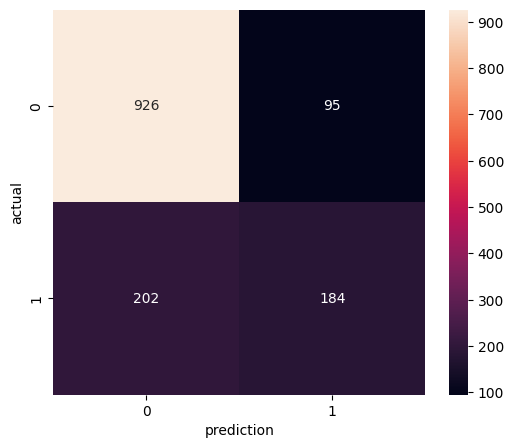

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual')